In [1]:
%matplotlib ipympl

In [2]:
import mpl_interactions.ipyplot as iplt

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from matplotlib.widgets import Slider

This simple example below illustrates how the echelle slider works with synthetic data.

In [5]:
# Here we will generate some mock data to test the echelle diagram
mockfr = np.array([1.0, 2.2, 3.4, 4.6, 5.8, 7.0, 8.2])
mocksnr = np.array([10, 20, 15, 25, 30, 35, 40])

# Sorting the frequencies
mockfr = np.sort(mockfr)

# Calculate the spacing between consecutive frequencies
mocksp = np.diff(mockfr)

# Calculate the median spacing 
median_mocksp = np.median(mocksp)

print("First estimate of dnu is", median_mocksp)

First estimate of dnu is 1.2


Text(0.5, 1.0, 'Echelle Diagram')

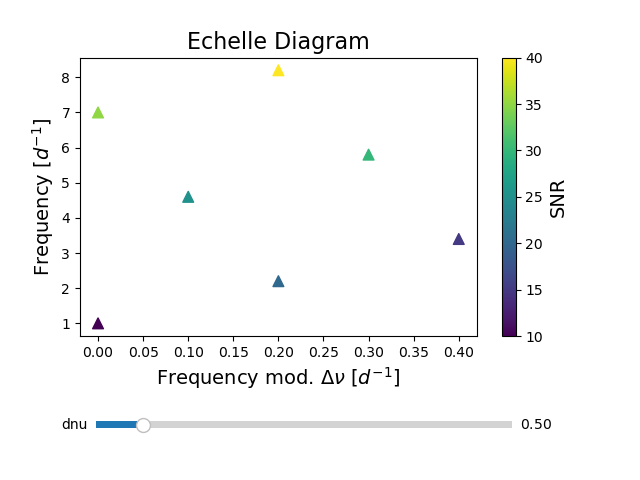

In [6]:
# define the function modulus dnu
def mockfun(mockdnu, **kwargs):
    return mockfr % mockdnu

# Plot the echelle diagram
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=.3)

axdnu = plt.axes([0.15, 0.1, 0.65, 0.03])
slider = Slider(axdnu, label='dnu', valmin=.05, valmax = 4.05, valstep=0.005)
controls = iplt.scatter(
    mockfun,
    mockfr,
    mockdnu=slider, 
    use_ipywidgets=False, 
    c=mocksnr, 
    cmap='viridis', 
    s=60, 
    ylim="auto",
    marker='^',
    ax=ax)
                     
plt.colorbar().set_label(label='SNR', size=14)
ax.set_xlabel(r'Frequency mod. $\Delta \nu$ [$d^{-1}$]', fontsize=14)
ax.set_ylabel(r'Frequency [$d^{-1}$]', fontsize=14)
ax.set_title('Echelle Diagram', fontsize=16)

Here below we use the echelle slider with the target star TIC174899989 observed by TESS. The inputs are a file containing the list of detected frequencies and another one which contains the corresponding SNR of each frequency.

In [7]:
freqs = np.loadtxt('freqcol_TIC174899989.dat')
snr = np.loadtxt('SNR_TIC17489989.dat')

In [8]:
# Upper and lower limits for the frequency set
llim = 30.0
ulim = 60.0
freqind = (freqs > llim) & (freqs<ulim)

In [9]:
freqs[freqind]

array([30.34420706, 30.65495909, 31.42674947, 31.96146326, 33.38325331,
       33.92240306, 36.94066695, 37.32436046, 40.01756578, 43.45400016,
       43.80905007, 49.72918912, 49.86573289, 53.10776307])

In [10]:
freqs = freqs[ freqind ]
snr = snr[ freqind ]

In [11]:
# Upper and lower limits for dnu exploration
ldnu = 0.05
udnu = 8.05
ndnu = 800
dnu = np.linspace(ldnu, udnu, ndnu)

In [13]:
# define the function modulus dnu
def fun(dnu, **kwargs):
    return freqs % dnu

Text(0.5, 1.0, 'Echelle Diagram')

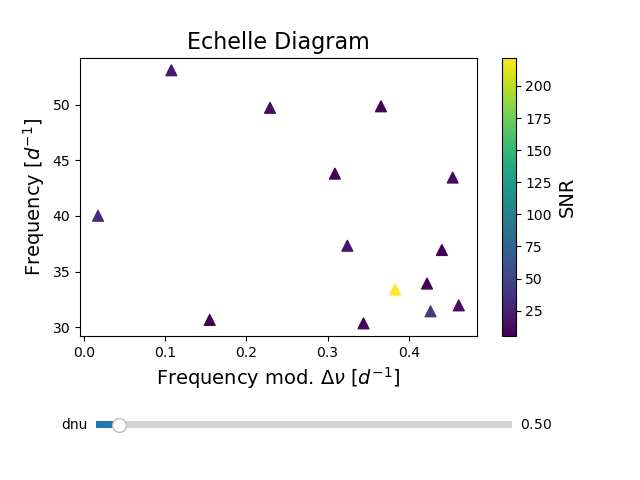

In [14]:
# Plot the echelle diagram with the slider
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=.3)

axdnu = plt.axes([0.15, 0.1, 0.65, 0.03])
slider = Slider(axdnu, label='dnu', valmin=.05, valmax = 8.05, valstep=0.005)
controls = iplt.scatter(
    fun,
    freqs,
    dnu=slider, 
    use_ipywidgets=False, 
    c=snr, 
    cmap='viridis', 
    s=60, 
    ylim="auto",
    marker='^',
    ax=ax)
                     
plt.colorbar().set_label(label='SNR', size=14)
ax.set_xlabel(r'Frequency mod. $\Delta \nu$ [$d^{-1}$]', fontsize=14)
ax.set_ylabel(r'Frequency [$d^{-1}$]', fontsize=14)
ax.set_title('Echelle Diagram', fontsize=16)

The $\Delta\nu$ is estimated to be 6.145 $d^{-1}$. Although it appears that some of the modes are missing in the echelle diagram we can identify the pattern with l numbers.

In [19]:
# Calculate the remainder when dividing each frequency by dnu
dnu = 6.145
remainder = freqs % dnu
freqs

array([30.34420706, 30.65495909, 31.42674947, 31.96146326, 33.38325331,
       33.92240306, 36.94066695, 37.32436046, 40.01756578, 43.45400016,
       43.80905007, 49.72918912, 49.86573289, 53.10776307])

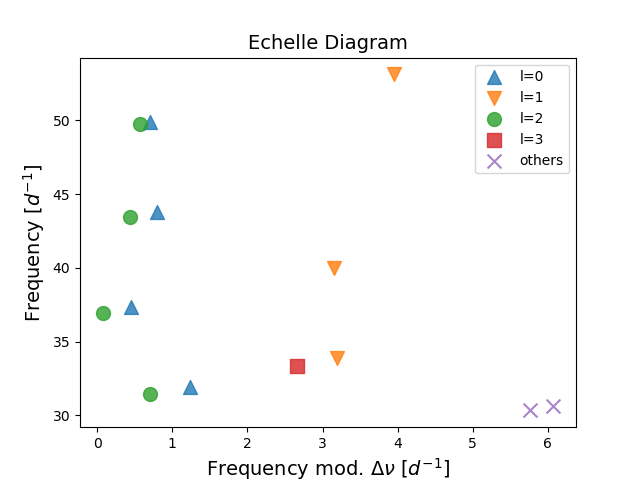

In [31]:
# The l value can be identify from the ridges
ridge_indices2 = [2,6,9,11]
ridge_indices0 = [3,7,10,12]
ridge_indices3 = [4]
ridge_indices1 = [5,8,13]
other_indices  = [0,1]
l2 = freqs[ridge_indices2]
l0 = freqs[ridge_indices0]
l3 = freqs[ridge_indices3]
l1 = freqs[ridge_indices1]
lot = freqs[other_indices]

# Plot the echelle diagram with different symbols for each ridge
plt.clf()
fig, ax = plt.subplots()
ax.scatter(remainder[ridge_indices0], l0, label='l=0', s=100, alpha=0.8, marker="^")
ax.scatter(remainder[ridge_indices1], l1, label='l=1', s=100, alpha=0.8, marker="v")
ax.scatter(remainder[ridge_indices2], l2, label='l=2', s=100, alpha=0.8, marker="o")
ax.scatter(remainder[ridge_indices3], l3, label='l=3', s=100, alpha=0.8, marker="s")
ax.scatter(remainder[other_indices], lot, label='others', s=100, alpha=0.8, marker="x")

ax.set_xlabel(r'Frequency mod. $\Delta \nu$ [$d^{-1}$]', fontsize=14)
ax.set_ylabel(r'Frequency [$d^{-1}$]', fontsize=14)
ax.set_title('Echelle Diagram', fontsize=14)
plt.legend()